### The purpose of this file is to convert the COCO format masks into png images
### It requires installation of pycocotools on one's system

In [3]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

In [10]:
## File paths where the annotations file and the images are stored
## These can be downloaded from `https://sartorius-research.github.io/LIVECell/`
annotations_file = '../../Datasets/Annotations/livecell_coco_test.json'
IMAGE_DIR = "../../Datasets/all_images/livecell_test_images"
OUTPUT_IMAGE_DIR = "data/images_tet"
OUTPUT_MASK_DIR = "data/masks_tet"

In [9]:
# Load file
coco = COCO(annotations_file)

loading annotations into memory...
Done (t=2.13s)
creating index...
index created!


In [11]:
# Get ids
img_ids = coco.getImgIds()

In [12]:
# How many images to print for testing
TEST_SIZE = 5

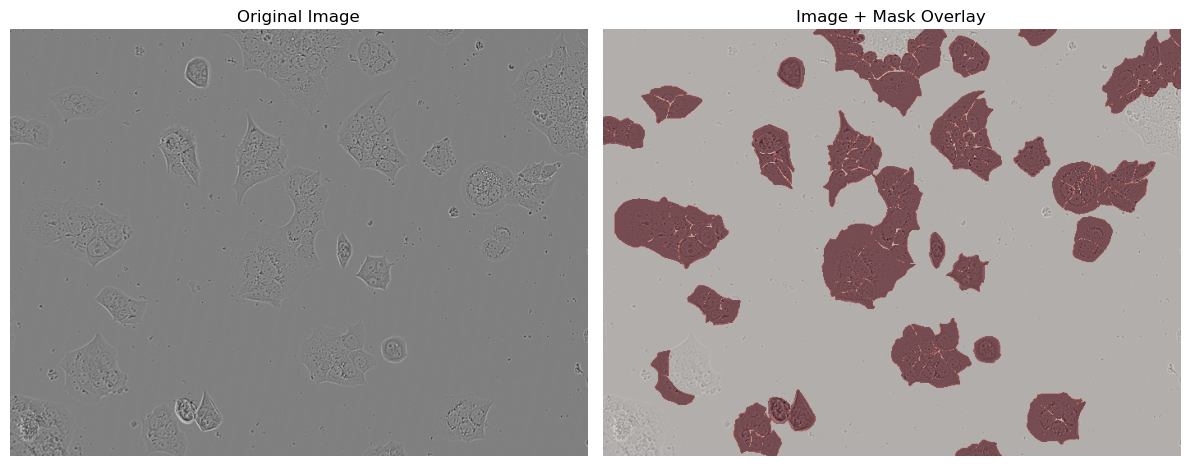

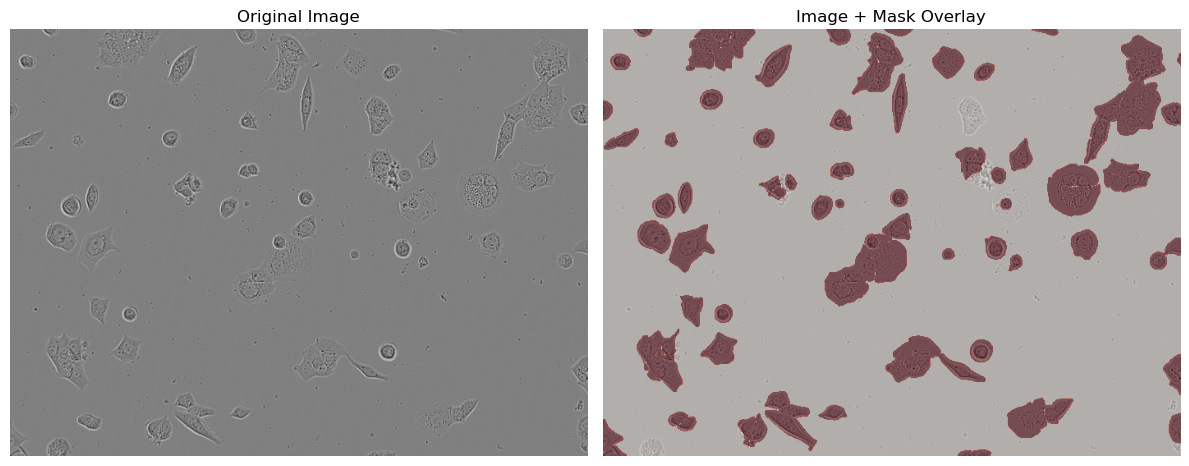

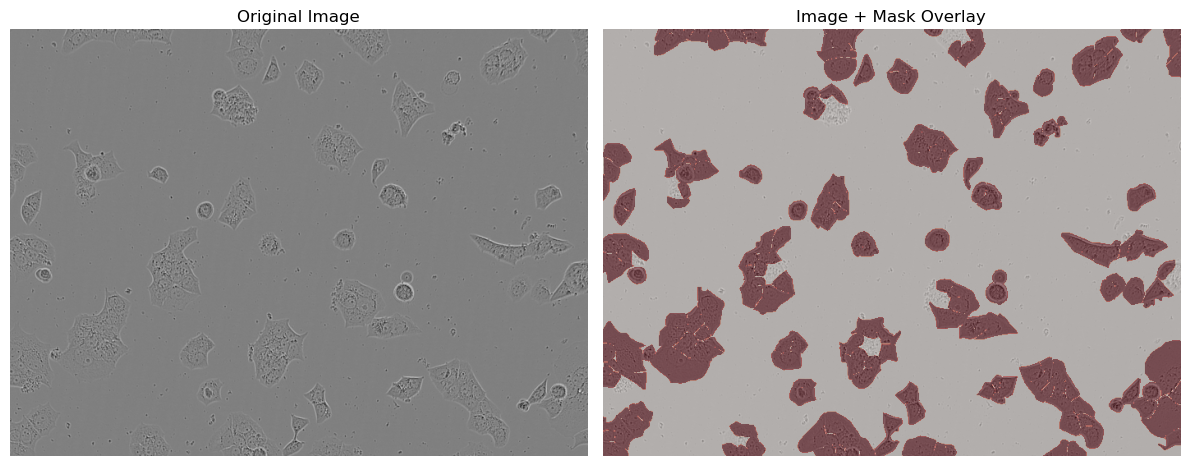

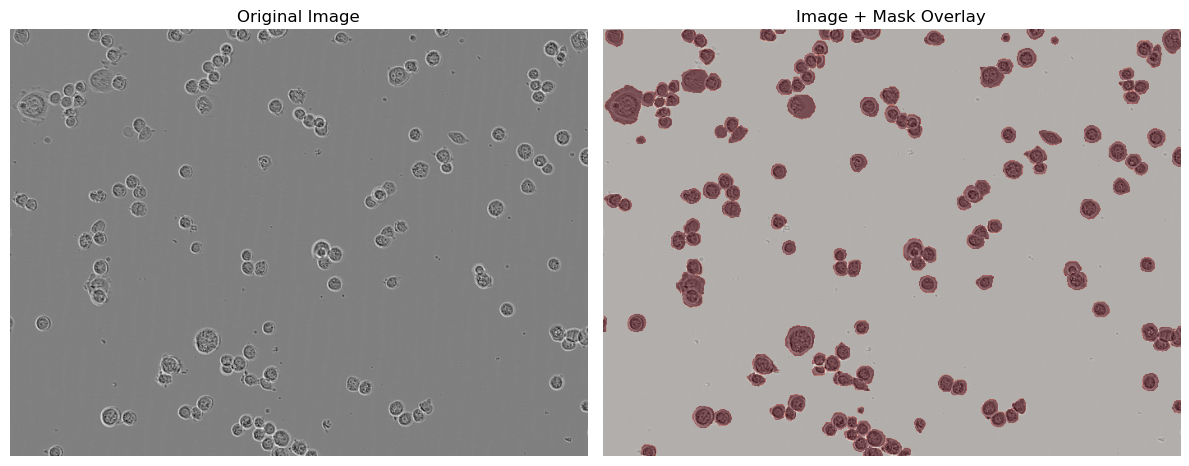

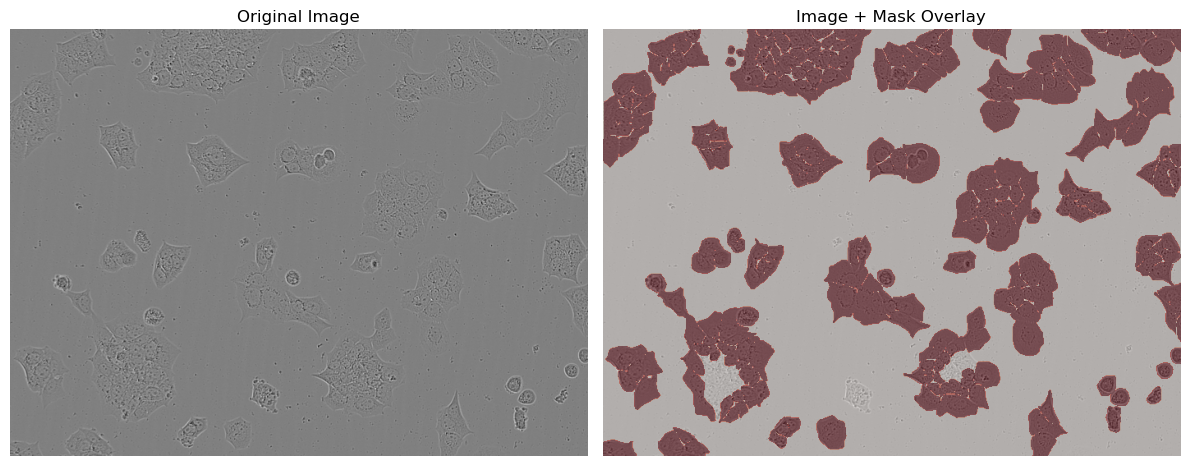

In [14]:
rand_idx = []
for idx in img_ids:
    img_info = coco.loadImgs(idx)[0]
    file_name = img_info['file_name']
    file_path = os.path.join(IMAGE_DIR, file_name)
    image = cv2.imread(file_path)
    if image is None:
        print(f"Could not read image: {file_path}")
        continue
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    ann_ids = coco.getAnnIds(imgIds=idx)
    anns = coco.loadAnns(ann_ids)
    for ann in anns:
        rle = coco.annToRLE(ann)
        m = maskUtils.decode(rle)
        mask = np.maximum(mask, m)  # Combine masks
    base_name = os.path.splitext(file_name)[0]
    img_save_path = os.path.join(OUTPUT_IMAGE_DIR, f"{base_name}.png")
    mask_save_path = os.path.join(OUTPUT_MASK_DIR, f"{base_name}_mask.png")
    cv2.imwrite(img_save_path, image)
    cv2.imwrite(mask_save_path, (mask * 255).astype(np.uint8)) 
    should_print = False
    if len(rand_idx) < TEST_SIZE:
        random_number = random.randint(1, 1000)
        if random_number < 200:
            rand_idx.append(idx)
            should_print = True
    if should_print:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Image + Mask Overlay")
        plt.imshow(image)
        plt.imshow(mask, alpha=0.4, cmap='Reds')
        plt.axis('off')

        plt.tight_layout()
        plt.show()